In [1]:
import pandas as pd

# Load the data from the CSV file
file_path = '/home/peiman/projects/RayInference/AzureLLMInferenceTrace_conv.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and the column names to understand its structure
data.head(), data.columns


(                     TIMESTAMP  ContextTokens  GeneratedTokens
 0  2023-11-16 18:15:46.6805900            374               44
 1  2023-11-16 18:15:50.9951690            396              109
 2  2023-11-16 18:15:51.2224670            879               55
 3  2023-11-16 18:15:51.3910170             91               16
 4  2023-11-16 18:15:52.5732450             91               16,
 Index(['TIMESTAMP', 'ContextTokens', 'GeneratedTokens'], dtype='object'))

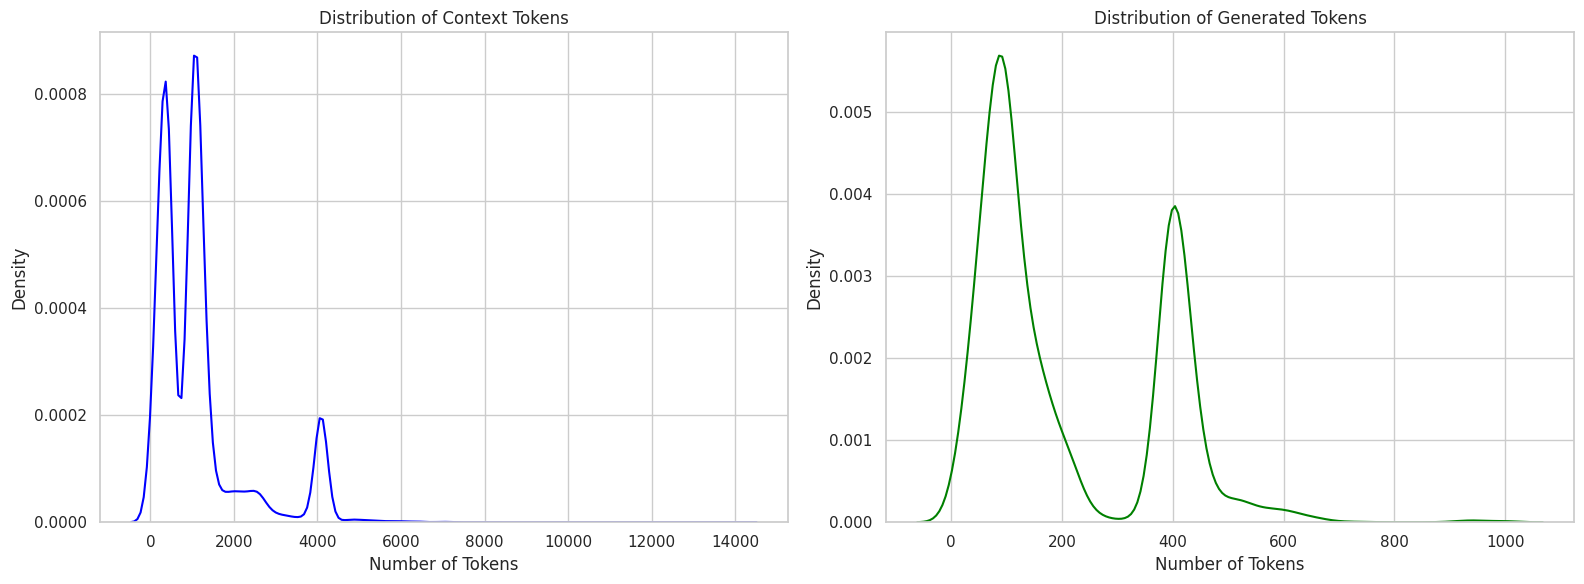

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot for ContextTokens
sns.kdeplot(data['ContextTokens'], ax=ax[0], color='blue')
ax[0].set_title('Distribution of Context Tokens')
ax[0].set_xlabel('Number of Tokens')
ax[0].set_ylabel('Density')

# Plot for GeneratedTokens
sns.kdeplot(data['GeneratedTokens'], ax=ax[1], color='green')
ax[1].set_title('Distribution of Generated Tokens')
ax[1].set_xlabel('Number of Tokens')
ax[1].set_ylabel('Density')

# Display the plots
plt.tight_layout()
plt.savefig('plots/context_generated_tokens.png')

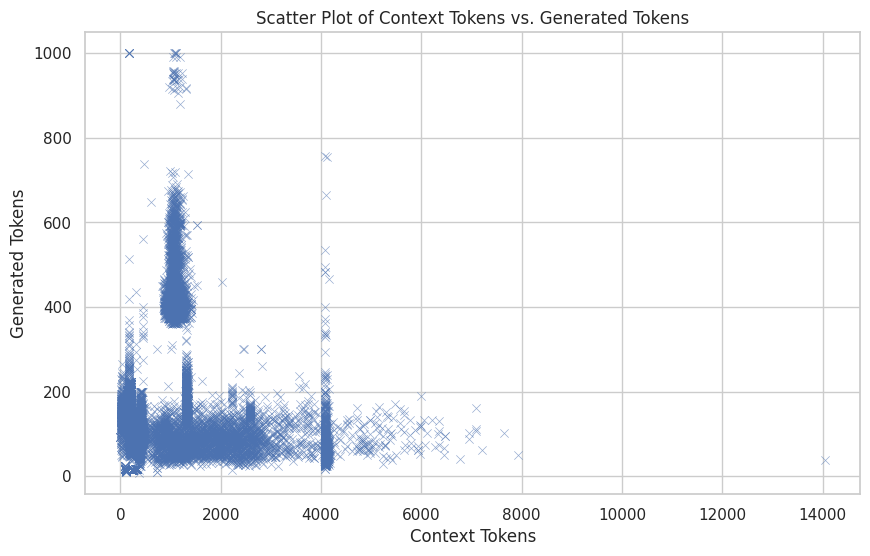

In [3]:
# Create a scatter plot to visualize the relationship between context tokens and generated tokens
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['ContextTokens'], y=data['GeneratedTokens'], alpha=0.6, edgecolor=None, marker='x')
plt.title('Scatter Plot of Context Tokens vs. Generated Tokens')
plt.xlabel('Context Tokens')
plt.ylabel('Generated Tokens')
plt.grid(True)
plt.savefig('plots/context_generated_tokens_scatter.png')




In [4]:

import pandas as pd
data =  pd.read_csv('/home/peiman/projects/RayInference/unique_labeled_prompts.csv')
data.head()

,Unnamed: 0,prompt,response,source,prompt_length,TIMESTAMP,ContextTokens,GeneratedTokens,llm
0,0,What happened in 1908?,There were several significant events that too...,unified_abstract_infill_output-100-000-x.jsonl,22,2023-11-16 18:19:09.3845110,22,147,llama-2-7b-chat-hf
1,1,What happened in 2011?,"As an AI language model, I don't have personal...",unified_abstract_infill_output-100-000-x.jsonl,22,2023-11-16 18:19:09.3845110,22,147,mistral-7b-instruct
2,2,What happened in 1845?,There were several significant events that occ...,unified_abstract_infill_output_0-100_000.jsonl,22,2023-11-16 18:19:09.3845110,22,147,mistral-7b-instruct
3,3,What happened in 1991?,There were several significant events that hap...,unified_abstract_infill_output-100-000-x.jsonl,22,2023-11-16 18:19:09.3845110,22,147,mistral-7b-instruct
4,4,What happened in 1870?,Here are some major events that took place in ...,unified_abstract_infill_output_0-100_000.jsonl,22,2023-11-16 18:19:09.3845110,22,147,gpt-2


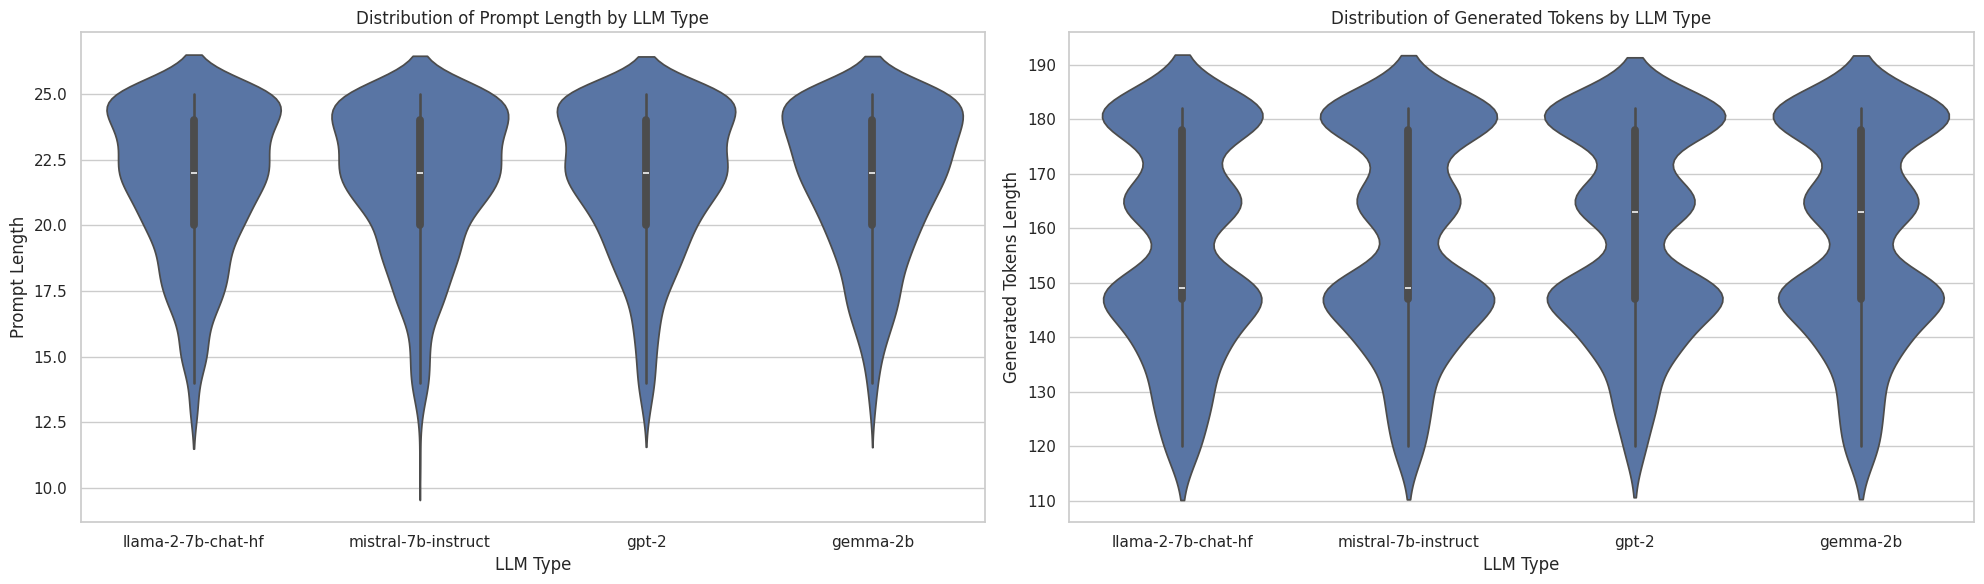

In [5]:
# Create a new column for the length of the prompt and generated tokens
import seaborn as sns
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Plot the distribution of prompt length for each LLM type
sns.violinplot(x='llm', y='prompt_length', data=data, ax=axes[0])
axes[0].set_title('Distribution of Prompt Length by LLM Type')
axes[0].set_xlabel('LLM Type')
axes[0].set_ylabel('Prompt Length')

# Plot the distribution of generated tokens for each LLM type
sns.violinplot(x='llm', y='GeneratedTokens', data=data, ax=axes[1])
axes[1].set_title('Distribution of Generated Tokens by LLM Type')
axes[1].set_xlabel('LLM Type')
axes[1].set_ylabel('Generated Tokens Length')

plt.tight_layout()
plt.savefig('plots/violin_generated_tokens.png')

In [6]:
import json

# Define the paths to the files for easier access
file_paths = [
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_1_20240418-140239.json",
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_2_20240418-141010.json",
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_3_20240418-141622.json",
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_4_20240418-142209.json",
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_5_20240418-142744.json",
    "/home/peiman/projects/RayInference/logs/multiActor/gpt-2-1to6-batch/experiment_results_6_20240418-143317.json"
]

# Load all the data from the JSON files into a list of dictionaries
experiment_data = []
for path in file_paths:
    with open(path, 'r') as file:
        data = json.load(file)
        experiment_data.append(data)

# Print to verify the loaded data
experiment_data[0]  # Show the first entry to check structure


{'/home/peiman/projects/RayInference/unique_labeled_prompts.csv': [{'batch_size': 1,
   'total_time': 336.5421848297119,
   'results': [{'generated_text': [{'0': 'What happened in 1870?\n\nIn July 1880 there were no more massacres against peasants and non-POWs. The anti-POW Front held 10,000 prisoners. Thousands of peasants joined forces. From the beginning of October to March 18'}],
     'batch_info': [{'model_type': 'gpt-2',
       'batch_size': 1,
       'inference_time': 5.857288360595703,
       'memory_used': 720,
       'batch_number': 0}]},
    {'generated_text': [{'0': 'What happened in 2002?\n\nI am no longer employed at the time. How does that change things?\n\nA lot. The job market is back to normal, and they are starting to get a lot cheaper, but as you say,'}],
     'batch_info': [{'model_type': 'gpt-2',
       'batch_size': 1,
       'inference_time': 5.842464208602905,
       'memory_used': 720,
       'batch_number': 5}]},
    {'generated_text': [{'0': 'What happened i

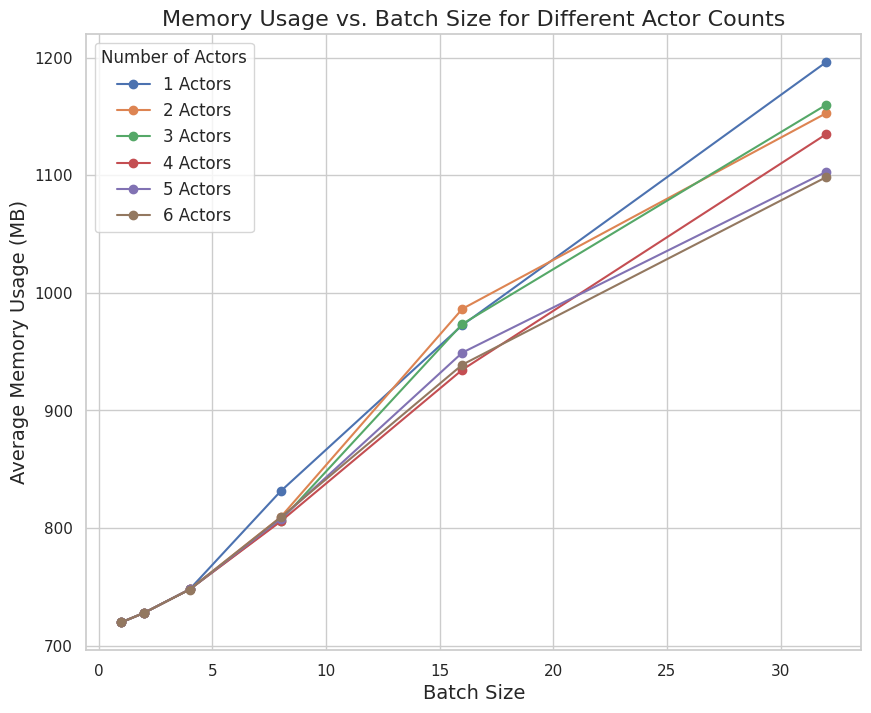

In [7]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
actor_data = {}
for i, data in enumerate(experiment_data, start=1):
    actor_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        memory_usage = [result['batch_info'][0]['memory_used'] for result in entry['results']]
        average_memory_usage = sum(memory_usage) / len(memory_usage)
        actor_data[i][batch_size] = average_memory_usage

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each actor's batch size vs inference time
for actor, data in actor_data.items():
    batch_sizes = sorted(data.keys())
    memory_usage = [data[bs] for bs in batch_sizes]
    ax.plot(batch_sizes, memory_usage, marker='o', label=f'{actor} Actors')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Average Memory Usage (MB)', fontsize=14)
ax.set_title('Memory Usage vs. Batch Size for Different Actor Counts', fontsize=16)
ax.legend(title="Number of Actors", fontsize=12)
plt.grid(True)
plt.savefig('plots/memory_usageavg_vs_batch_size.png')


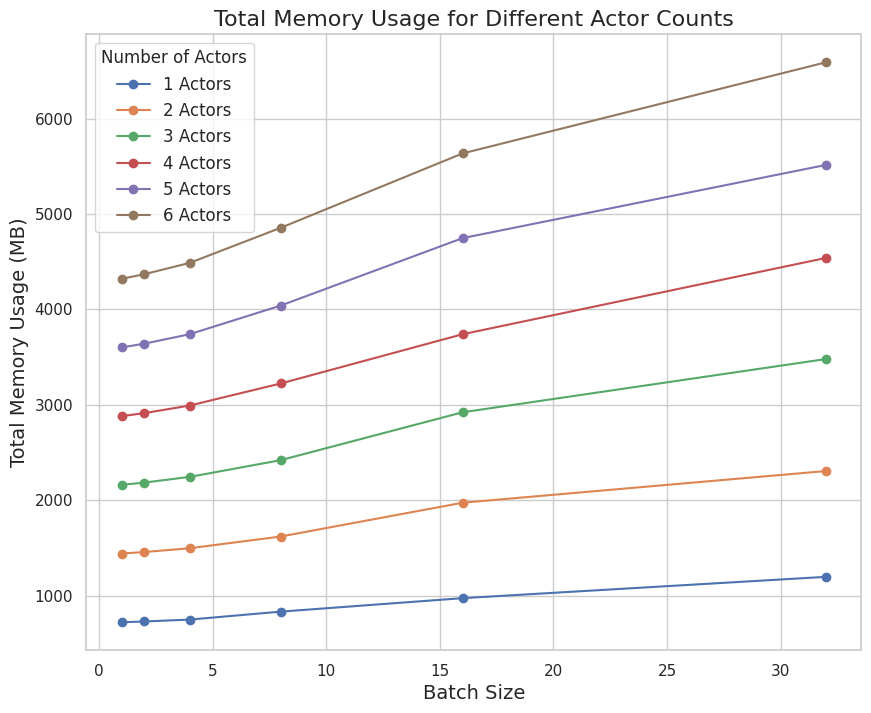

In [8]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
actor_data = {}
for i, data in enumerate(experiment_data, start=1):
    actor_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        memory_usage = [result['batch_info'][0]['memory_used'] for result in entry['results']]
        average_memory_usage = sum(memory_usage) / len(memory_usage)
        actor_data[i][batch_size] = average_memory_usage

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

batch_mem_time_dict = {}

# Plotting each actor's batch size vs inference time
for actor, data in actor_data.items():
    batch_sizes = sorted(data.keys())
    memory_usage = [data[bs]*actor for bs in batch_sizes]
    ax.plot(batch_sizes, memory_usage, marker='o', label=f'{actor} Actors')
    for bs in batch_sizes:
        if bs not in batch_mem_time_dict:
            batch_mem_time_dict[bs] = {}
        batch_mem_time_dict[bs][actor] = {'memory': data[bs] * actor, 'time': None}

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Total Memory Usage (MB)', fontsize=14)
ax.set_title('Total Memory Usage for Different Actor Counts', fontsize=16)
ax.legend(title="Number of Actors", fontsize=12)
plt.grid(True)
plt.savefig('plots/tot_memory_usage.png')


In [9]:
batch_mem_time_dict

{1: {1: {'memory': 720.0, 'time': None},
  2: {'memory': 1440.0, 'time': None},
  3: {'memory': 2160.0, 'time': None},
  4: {'memory': 2880.0, 'time': None},
  5: {'memory': 3600.0, 'time': None},
  6: {'memory': 4319.947712418301, 'time': None}},
 2: {1: {'memory': 728.0, 'time': None},
  2: {'memory': 1456.0, 'time': None},
  3: {'memory': 2184.0, 'time': None},
  4: {'memory': 2912.0, 'time': None},
  5: {'memory': 3640.0, 'time': None},
  6: {'memory': 4368.0, 'time': None}},
 4: {1: {'memory': 748.0, 'time': None},
  2: {'memory': 1495.8434782608695, 'time': None},
  3: {'memory': 2243.7652173913043, 'time': None},
  4: {'memory': 2991.686956521739, 'time': None},
  5: {'memory': 3739.478260869565, 'time': None},
  6: {'memory': 4486.95652173913, 'time': None}},
 8: {1: {'memory': 831.304347826087, 'time': None},
  2: {'memory': 1618.5391304347827, 'time': None},
  3: {'memory': 2418.939130434783, 'time': None},
  4: {'memory': 3222.5391304347827, 'time': None},
  5: {'memory': 40

In [10]:
batch_mem_time_dict

{1: {1: {'memory': 720.0, 'time': None},
  2: {'memory': 1440.0, 'time': None},
  3: {'memory': 2160.0, 'time': None},
  4: {'memory': 2880.0, 'time': None},
  5: {'memory': 3600.0, 'time': None},
  6: {'memory': 4319.947712418301, 'time': None}},
 2: {1: {'memory': 728.0, 'time': None},
  2: {'memory': 1456.0, 'time': None},
  3: {'memory': 2184.0, 'time': None},
  4: {'memory': 2912.0, 'time': None},
  5: {'memory': 3640.0, 'time': None},
  6: {'memory': 4368.0, 'time': None}},
 4: {1: {'memory': 748.0, 'time': None},
  2: {'memory': 1495.8434782608695, 'time': None},
  3: {'memory': 2243.7652173913043, 'time': None},
  4: {'memory': 2991.686956521739, 'time': None},
  5: {'memory': 3739.478260869565, 'time': None},
  6: {'memory': 4486.95652173913, 'time': None}},
 8: {1: {'memory': 831.304347826087, 'time': None},
  2: {'memory': 1618.5391304347827, 'time': None},
  3: {'memory': 2418.939130434783, 'time': None},
  4: {'memory': 3222.5391304347827, 'time': None},
  5: {'memory': 40

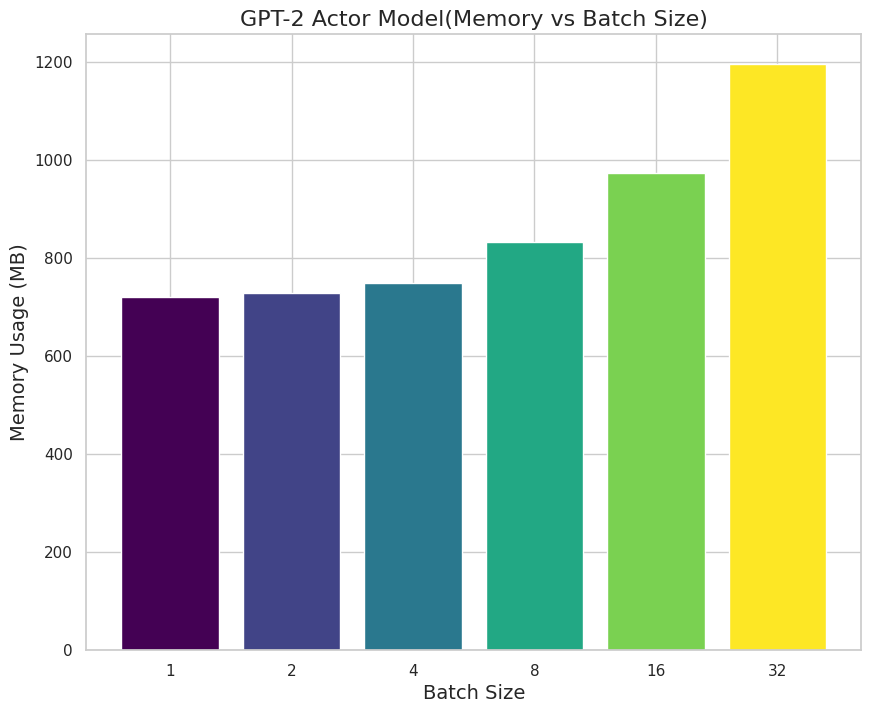

In [11]:
import matplotlib.cm as cm
import numpy as np

# Create the bar plot
fig, ax = plt.subplots(figsize=(10, 8))

batch_sizes = sorted(actor_data[1].keys())
memory_usage = [actor_data[1].get(bs) for bs in batch_sizes]

# Convert batch sizes to strings
batch_sizes_str = [str(bs) for bs in batch_sizes]

# Generate a color for each bar using a colormap
colors = cm.viridis(np.linspace(0, 1, len(batch_sizes)))

ax.bar(batch_sizes_str, memory_usage, color=colors)

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Memory Usage (MB)', fontsize=14)
ax.set_title('GPT-2 Actor Model(Memory vs Batch Size)', fontsize=16)

# plt.grid(True)
plt.savefig('plots/gpt2_actor_memory.png')

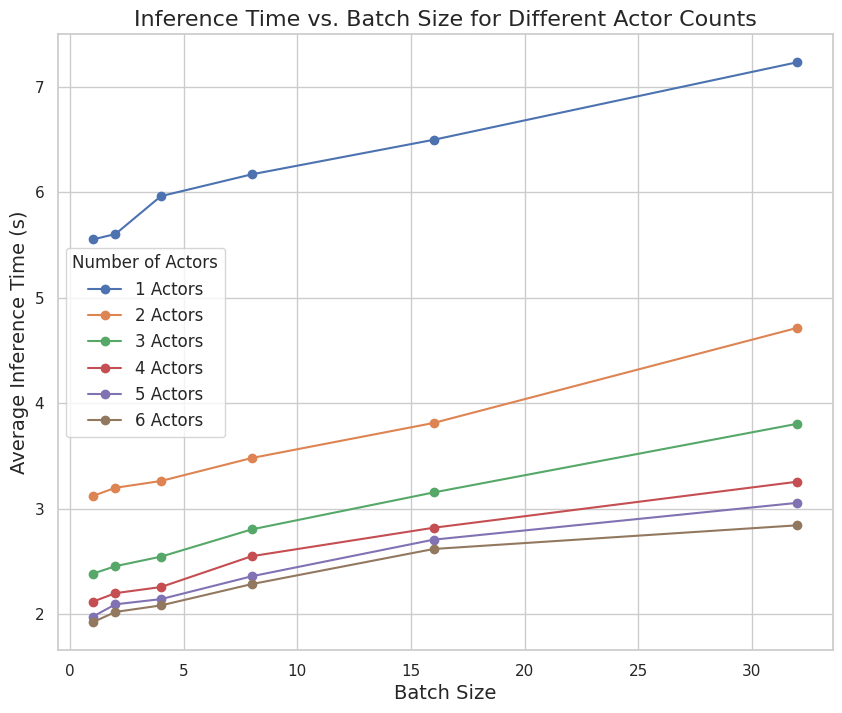

In [12]:
import matplotlib.pyplot as plt

# Prepare the data for plotting
actor_data = {}
for i, data in enumerate(experiment_data, start=1):
    actor_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        infernce_time = [result['batch_info'][0]['inference_time'] for result in entry['results']]
        average_inference_time = sum(infernce_time) / len(infernce_time)
        actor_data[i][batch_size] = average_inference_time

# Create plots
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each actor's batch size vs inference time
for actor, data in actor_data.items():
    batch_sizes = sorted(data.keys())
    infernce_time = [data[bs] for bs in batch_sizes]
    ax.plot(batch_sizes, infernce_time, marker='o', label=f'{actor} Actors')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Average Inference Time (s)', fontsize=14)
ax.set_title('Inference Time vs. Batch Size for Different Actor Counts', fontsize=16)
ax.legend(title="Number of Actors", fontsize=12)
plt.grid(True)
plt.savefig('plots/avg_inference_time.png')


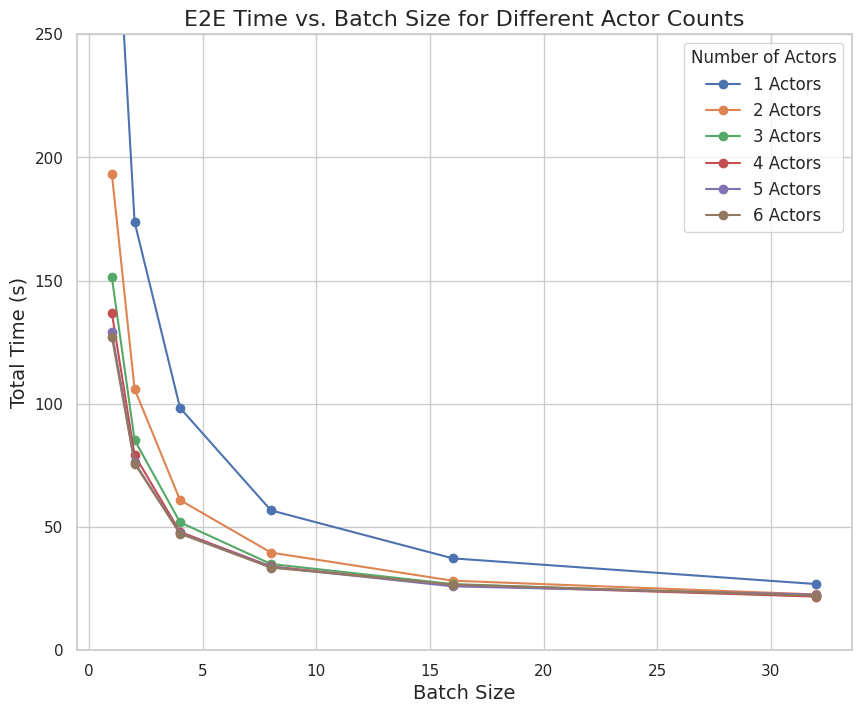

In [13]:
# Prepare data for plotting total times
total_time_data = {}
for i, data in enumerate(experiment_data, start=1):
    total_time_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        total_time = entry['total_time']
        total_time_data[i][batch_size] = total_time

# Create plots for total time comparison
fig, ax = plt.subplots(figsize=(10, 8))

# Plotting each actor's batch size vs total time
for actor, data in total_time_data.items():
    batch_sizes = sorted(data.keys())
    total_times = [data[bs] for bs in batch_sizes]
    ax.plot(batch_sizes, total_times, marker='o', label=f'{actor} Actors')

ax.set_xlabel('Batch Size', fontsize=14)
ax.set_ylabel('Total Time (s)', fontsize=14)
ax.set_title('E2E Time vs. Batch Size for Different Actor Counts', fontsize=16)
ax.legend(title="Number of Actors", fontsize=12)
# Set y-axis limits
ax.set_ylim([0, 250])
plt.grid(True)
plt.savefig('plots/e2e_time.png')



In [14]:
# Prepare the data for plotting
actor_data = {}
for i, data in enumerate(experiment_data, start=1):
    actor_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        memory_usage = [result['batch_info'][0]['memory_used'] for result in entry['results']]
        average_memory_usage = sum(memory_usage) / len(memory_usage)
        actor_data[i][batch_size] = average_memory_usage

# Prepare data for plotting total times
total_time_data = {}
for i, data in enumerate(experiment_data, start=1):
    total_time_data[i] = {}
    for entry in data[next(iter(data))]:  # Navigate through the nested dictionary
        batch_size = entry['batch_size']
        total_time = entry['total_time']
        total_time_data[i][batch_size] = total_time

# Update the batch_mem_time_dict to include the total times
batch_mem_time_dict = {}
for actor, data in actor_data.items():
    batch_sizes = sorted(data.keys())
    for bs in batch_sizes:
        if bs not in batch_mem_time_dict:
            batch_mem_time_dict[bs] = {}
        batch_mem_time_dict[bs][actor] = {'memory': data[bs] * actor, 'time': total_time_data[actor][bs]}


In [15]:
batch_mem_time_dict

{1: {1: {'memory': 720.0, 'time': 336.5421848297119},
  2: {'memory': 1440.0, 'time': 193.41102766990662},
  3: {'memory': 2160.0, 'time': 151.43773794174194},
  4: {'memory': 2880.0, 'time': 136.88494443893433},
  5: {'memory': 3600.0, 'time': 129.24668383598328},
  6: {'memory': 4319.947712418301, 'time': 127.28199696540833}},
 2: {1: {'memory': 728.0, 'time': 173.82738590240479},
  2: {'memory': 1456.0, 'time': 106.0083703994751},
  3: {'memory': 2184.0, 'time': 85.31773233413696},
  4: {'memory': 2912.0, 'time': 79.17464327812195},
  5: {'memory': 3640.0, 'time': 76.23887324333191},
  6: {'memory': 4368.0, 'time': 75.78963661193848}},
 4: {1: {'memory': 748.0, 'time': 98.36630153656006},
  2: {'memory': 1495.8434782608695, 'time': 60.9479877948761},
  3: {'memory': 2243.7652173913043, 'time': 51.92509198188782},
  4: {'memory': 2991.686956521739, 'time': 48.04135012626648},
  5: {'memory': 3739.478260869565, 'time': 47.50247526168823},
  6: {'memory': 4486.95652173913, 'time': 47.3

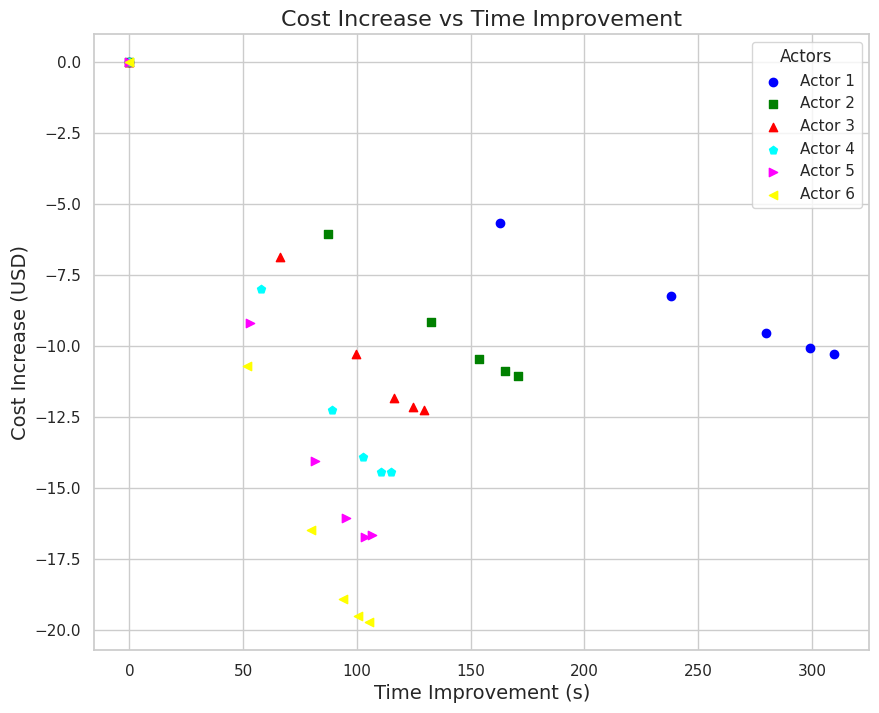

In [16]:
import matplotlib.pyplot as plt

# Constants
BASE_COST_PER_GB_PER_SEC = 0.05  # Example base cost in USD per GB per second

# Calculate costs using the cost function (time * memory * base cost)
for batch_size, actors_data in batch_mem_time_dict.items():
    for actor, metrics in actors_data.items():
        if metrics['time'] is not None and metrics['memory'] is not None:
            memory_in_gb = metrics['memory'] / 1024  # Convert memory usage from MB to GB
            cost = metrics['time'] * memory_in_gb * BASE_COST_PER_GB_PER_SEC
            batch_mem_time_dict[batch_size][actor]['cost'] = cost
        else:
            batch_mem_time_dict[batch_size][actor]['cost'] = None

# Prepare data for plotting cost increase vs time improvement
actor_data_for_plot = {}
actors = sorted(actor_data.keys())  # Ensure consistent order
for actor in actors:
    actor_data_for_plot[actor] = {'times': [], 'costs': []}
    initial_time = batch_mem_time_dict[min(batch_mem_time_dict.keys())][actor]['time']
    initial_cost = batch_mem_time_dict[min(batch_mem_time_dict.keys())][actor]['cost']
    for batch_size in sorted(batch_mem_time_dict.keys()):
        if batch_mem_time_dict[batch_size][actor]['time'] and batch_mem_time_dict[batch_size][actor]['cost']:
            time_improvement = initial_time - batch_mem_time_dict[batch_size][actor]['time']
            cost_increase = batch_mem_time_dict[batch_size][actor]['cost'] - initial_cost
            actor_data_for_plot[actor]['times'].append(time_improvement)
            actor_data_for_plot[actor]['costs'].append(cost_increase)

# Plotting cost increase vs time improvement
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
markers = ['o', 's', '^', 'p', '>', '<', '*']
for idx, (actor, data) in enumerate(actor_data_for_plot.items()):
    ax.scatter(data['times'], data['costs'], color=colors[idx % len(colors)], marker=markers[idx % len(markers)], label=f'Actor {actor}')

ax.set_xlabel('Time Improvement (s)', fontsize=14)
ax.set_ylabel('Cost Increase (USD)', fontsize=14)
ax.set_title('Cost Increase vs Time Improvement', fontsize=16)
ax.legend(title="Actors")
plt.grid(True)
plt.show()


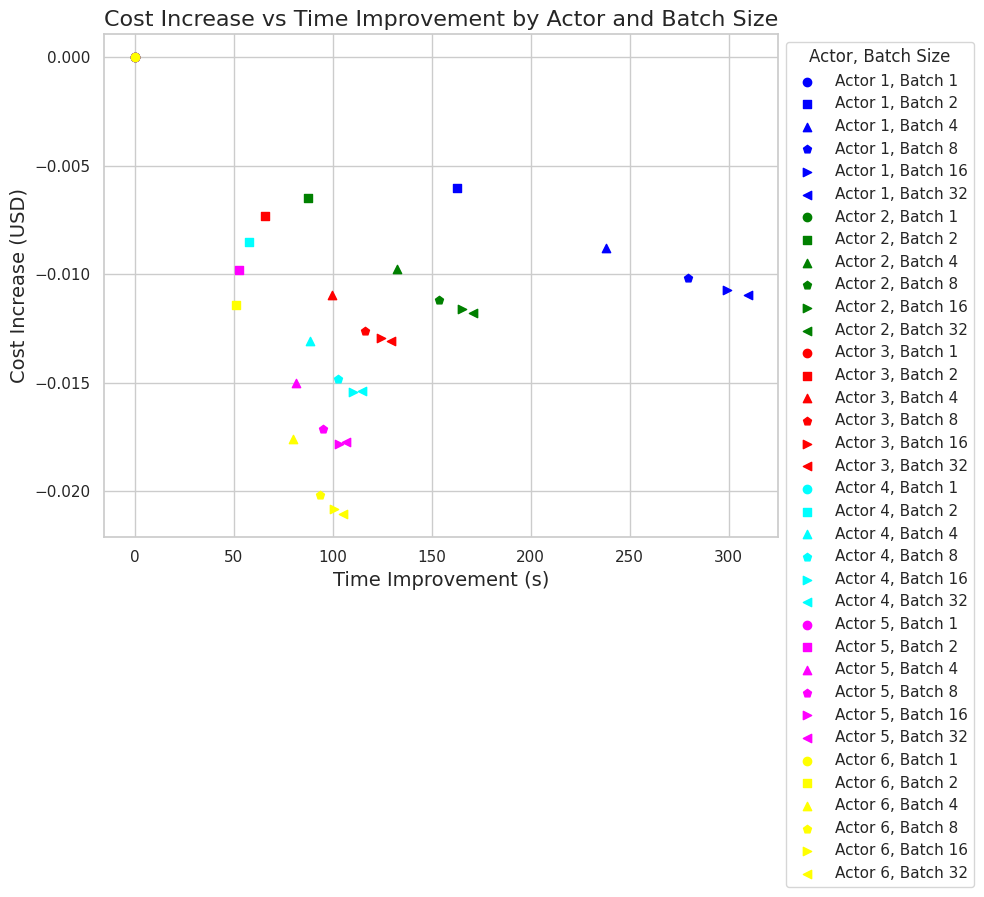

In [19]:
import matplotlib.pyplot as plt

# Constants
BASE_COST_PER_GB_PER_SEC = 0.0000534  # Example base cost in USD per GB per second

# Calculate costs using the cost function (time * memory * base cost)
for batch_size, actors_data in batch_mem_time_dict.items():
    for actor, metrics in actors_data.items():
        if metrics['time'] is not None and metrics['memory'] is not None:
            memory_in_gb = metrics['memory'] / 1024  # Convert memory usage from MB to GB
            cost = metrics['time'] * memory_in_gb * BASE_COST_PER_GB_PER_SEC
            batch_mem_time_dict[batch_size][actor]['cost'] = cost
        else:
            batch_mem_time_dict[batch_size][actor]['cost'] = None

# Prepare data for plotting cost increase vs time improvement
plot_data = {}
actors = sorted(actor_data.keys())  # Ensure consistent order of actors
batch_sizes = sorted(batch_mem_time_dict.keys())  # Ensure consistent order of batch sizes
for actor in actors:
    for batch_size in batch_sizes:
        key = (actor, batch_size)
        plot_data[key] = {'time_improvement': [], 'cost_increase': []}
        initial_time = batch_mem_time_dict[min(batch_mem_time_dict.keys())][actor]['time']
        initial_cost = batch_mem_time_dict[min(batch_mem_time_dict.keys())][actor]['cost']
        if batch_mem_time_dict[batch_size][actor]['time'] and batch_mem_time_dict[batch_size][actor]['cost']:
            time_improvement = initial_time - batch_mem_time_dict[batch_size][actor]['time']
            cost_increase = batch_mem_time_dict[batch_size][actor]['cost'] - initial_cost
            plot_data[key]['time_improvement'].append(time_improvement)
            plot_data[key]['cost_increase'].append(cost_increase)

# Plotting cost increase vs time improvement
fig, ax = plt.subplots(figsize=(10, 8))
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
markers = ['o', 's', '^', 'p', '>', '<', '*']

# Ensure unique markers and colors for each combination
color_marker_combinations = [(colors[i % len(colors)], markers[j % len(markers)]) for i in range(len(actors)) for j in range(len(batch_sizes))]

for idx, ((actor, batch_size), data) in enumerate(plot_data.items()):
    color, marker = color_marker_combinations[idx]
    ax.scatter(data['time_improvement'], data['cost_increase'], color=color, marker=marker,
               label=f'Actor {actor}, Batch {batch_size}')

ax.set_xlabel('Time Improvement (s)', fontsize=14)
ax.set_ylabel('Cost Increase (USD)', fontsize=14)
ax.set_title('Cost Increase vs Time Improvement by Actor and Batch Size', fontsize=16)
ax.legend(title="Actor, Batch Size", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('plots/cost_increase_vs_time_improvement.png')


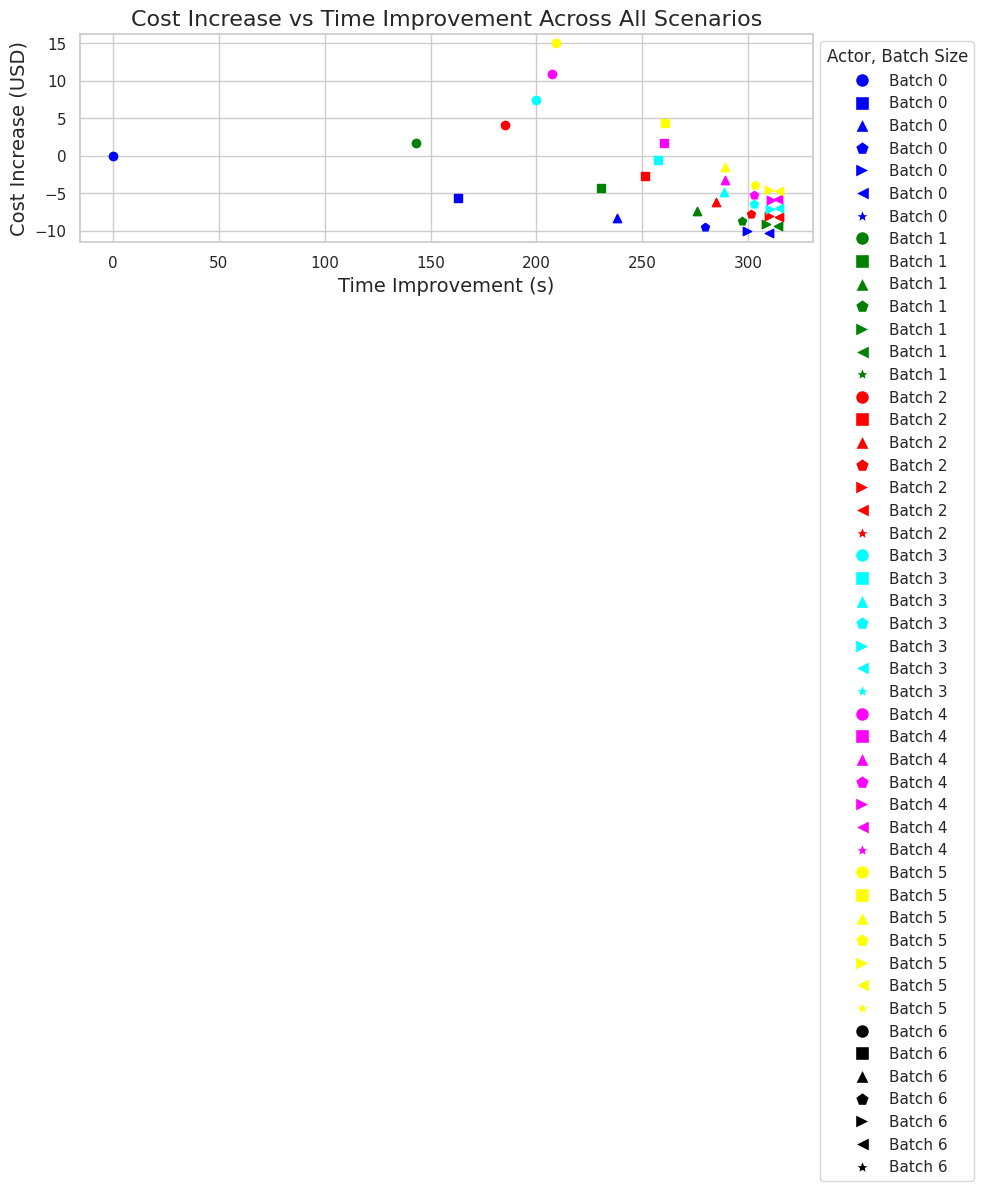

In [18]:
import matplotlib.pyplot as plt

# Constants
BASE_COST_PER_GB_PER_SEC = 0.05  # Example base cost in USD per GB per second

# Calculate costs using the cost function (time * memory * base cost)
for batch_size, actors_data in batch_mem_time_dict.items():
    for actor, metrics in actors_data.items():
        if metrics['time'] is not None and metrics['memory'] is not None:
            memory_in_gb = metrics['memory'] / 1024  # Convert memory usage from MB to GB
            cost = metrics['time'] * memory_in_gb * BASE_COST_PER_GB_PER_SEC
            batch_mem_time_dict[batch_size][actor]['cost'] = cost
        else:
            batch_mem_time_dict[batch_size][actor]['cost'] = None

# Base reference for initial time and cost
base_actor = min(actor_data.keys())
base_batch_size = min(batch_mem_time_dict.keys())
base_time = batch_mem_time_dict[base_batch_size][base_actor]['time']
base_cost = batch_mem_time_dict[base_batch_size][base_actor]['cost']

# Prepare data for plotting cost increase vs time improvement relative to the base scenario
plot_data = []
actors = sorted(actor_data.keys())
batch_sizes = sorted(batch_mem_time_dict.keys())

# Define colors and markers
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
markers = ['o', 's', '^', 'p', '>', '<', '*']
color_marker_combinations = [(colors[i % len(colors)], markers[j % len(markers)]) for i in range(len(actors)) for j in range(len(batch_sizes))]

# Collect data for plotting
for actor in actors:
    for batch_size in batch_sizes:
        current_time = batch_mem_time_dict[batch_size][actor]['time']
        current_cost = batch_mem_time_dict[batch_size][actor]['cost']
        if current_time and current_cost:
            time_improvement = base_time - current_time
            cost_increase = current_cost - base_cost
            idx = actors.index(actor) * len(batch_sizes) + batch_sizes.index(batch_size)
            color, marker = color_marker_combinations[idx]
            plot_data.append((time_improvement, cost_increase, color, marker, f'Actor {actor}, Batch {batch_size}'))

# Plotting cost increase vs time improvement for all scenarios
fig, ax = plt.subplots(figsize=(10, 8))
for time_improvement, cost_increase, color, marker, label in plot_data:
    ax.scatter(time_improvement, cost_increase, color=color, marker=marker, label=label)

# Creating a custom legend for clear differentiation
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker, color='w', label=f'Batch {batch_size}',
                          markerfacecolor=color, markersize=10) for batch_size, color in enumerate(colors) for marker in markers]
ax.legend(handles=legend_elements, title="Actor, Batch Size", loc='upper left', bbox_to_anchor=(1, 1))

ax.set_xlabel('Time Improvement (s)', fontsize=14)
ax.set_ylabel('Cost Increase (USD)', fontsize=14)
ax.set_title('Cost Increase vs Time Improvement Across All Scenarios', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
